Clusters' Centroids 4D coordinates
----------------------------------

[[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]]

Labels for input data after clustering
--------------------------------------

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


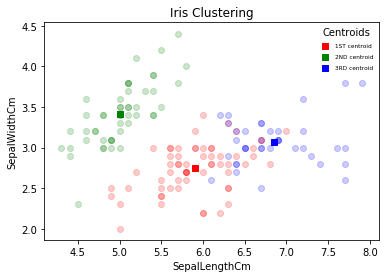

In [28]:
import numpy as np
import pandas as pd
import matplotlib
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# matplotlib.use('TkAgg')

%matplotlib inline


# using all columns except  id and species
data = pd.read_csv('../Envs/ML/Iris.csv', header=0, 
                   names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                   usecols=[1, 2, 3, 4])

data_2 = pd.DataFrame(data)

k_means = KMeans(n_clusters=3).fit(data_2)

print("Clusters' Centroids 4D coordinates\n----------------------------------\n")
print(k_means.cluster_centers_)
print("\nLabels for input data after clustering\n--------------------------------------\n")
print(k_means.labels_)

cluster_1_x = []
cluster_2_x = []
cluster_3_x = []

cluster_1_y = []
cluster_2_y = []
cluster_3_y = []

# Distribute input data to their respective clusters according to their label

for i in range(0, len(k_means.labels_)):

    if k_means.labels_[i] == 0:
        cluster_1_x.append(data_2['SepalLengthCm'][i])
        cluster_1_y.append(data_2['SepalWidthCm'][i])
    elif k_means.labels_[i] == 1:
        cluster_2_x.append(data_2['SepalLengthCm'][i])
        cluster_2_y.append(data_2['SepalWidthCm'][i])
    else:
        cluster_3_x.append(data_2['SepalLengthCm'][i])
        cluster_3_y.append(data_2['SepalWidthCm'][i])

# Convert the python lists to numpy arrays

cluster_1_x = np.array(cluster_1_x)
cluster_2_x = np.array(cluster_2_x)
cluster_3_x = np.array(cluster_3_x)
cluster_1_y = np.array(cluster_1_y)
cluster_2_y = np.array(cluster_2_y)
cluster_3_y = np.array(cluster_3_y)

plt.scatter([cluster_1_x], [cluster_1_y], alpha=0.2, c='r')
plt.scatter(k_means.cluster_centers_[0][0], k_means.cluster_centers_[0][1], marker='s', alpha=1, label='1ST centroid', c= 'r')

plt.scatter([cluster_2_x], [cluster_2_y],alpha=0.2, c='g')
plt.scatter(k_means.cluster_centers_[1][0], k_means.cluster_centers_[1][1], marker='s', alpha=1, label='2ND centroid', c= 'g')

plt.scatter([cluster_3_x], [cluster_3_y],alpha=0.2, c='b')
plt.scatter(k_means.cluster_centers_[2][0], k_means.cluster_centers_[2][1], marker='s', alpha=1, label='3RD centroid', c= 'b')

plt.legend(frameon=False, labelspacing=1, title='Centroids', loc='upper right', fontsize='xx-small')

plt.title('Iris Clustering')

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

plt.show()
